In [16]:
%matplotlib inline
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import data sources

In [17]:
male_ceo_stock_csv = "final_male_stock.csv"
female_ceo_stock_csv = "final_women_stock.csv"
male_ceos = "Fortune500_counterparts.csv"
female_ceos = "2019_WomenCEO_list.csv"

convert csv to data frames

In [18]:
male_df = pd.read_csv(male_ceo_stock_csv)
female_df = pd.read_csv(female_ceo_stock_csv)
male_ceos_df = pd.read_csv(male_ceos)
female_ceos_df = pd.read_csv(female_ceos)

In [19]:
male_df.tail()

,close,high,low,open,volume,Date,Ticker
2585,656.88,656.94,608.90,616.16,1774588.0,2019-04-30,Y
2586,663.30,691.99,647.90,657.47,2162027.0,2019-05-31,Y
2587,681.11,697.33,660.65,662.42,2196795.0,2019-06-28,Y
2588,685.73,714.60,677.00,687.06,1396235.0,2019-07-31,Y
2589,692.05,705.00,686.98,686.98,163231.0,2019-08-02,Y


In [20]:
male_ceos_df

,CEO,Company,2019 Fortune 500 Rank,Effective Date as CEO,Ticker Symbol (NYS/NASDAQ)
0,Tom Kingsbury,Burlington Storers,451,12/1/08,BURL
1,Bruce Van Saun,Citizens Financial Group,415,10/1/13,CFG
2,Weston M Hicks,Alleghany,437,12/1/04,Y
3,Robert H Swan,Intel,43,6/1/18,INTC
4,Satya Nadella,Microsoft,26,2/1/14,MSFT
5,Gregory Hayes,United Technologies,46,11/1/14,UTX
6,Dr. Thpmas Kennedy,Raytheon,114,3/1/14,RTN
7,Greg Maffei,Qurate,225,2/1/06,QRTEA
8,Jim Hackett,Ford Motor,12,5/1/17,F
9,Ernie Herman,TJX,85,1/1/16,TJX


In [21]:
female_ceos_df

,CEO,Company,2019 Fortune 500 ranking,effective date as CEO,Ticker Symbol (NYS/NASDAQ)
0,Laura Alber,Williams-Sonoma,495,5/1/10,WSM
1,Beth E. Mooney,KeyBank,413,5/1/11,KEY
2,Tricia Griffith,Progressive Corporation,99,7/1/16,PGR
3,Ginni Rometty[3],IBM,38,1/1/12,IBM
4,Safra A. Catz,Oracle Corporation,81,9/18/14,ORCL
5,Marillyn Hewson[4],Lockheed Martin,60,1/1/13,LMT
6,Phebe Novakovic,General Dynamics,92,1/20/13,GD
7,Mary Dillon,Ulta Beauty,449,6/1/13,ULTA
8,Mary Barra,General Motors,13,1/15/14,GM
9,Barbara Rentler,Ross Stores,209,6/1/14,ROST


In [22]:
female_df.head()

,close,high,low,open,volume,Date,Ticker
0,87.25,89.63,84.50,87.50,3054000.0,1998-02-27,GD
1,86.25,91.50,84.88,86.63,3517500.0,1998-03-31,GD
2,42.69,89.63,40.25,85.88,7177500.0,1998-04-30,GD
3,44.44,48.38,40.69,42.25,6794000.0,1998-05-29,GD
4,46.50,46.81,43.06,44.44,4962700.0,1998-06-30,GD


In [23]:
fem_index = female_df.set_index(['Ticker','Date'])
fem_index.head()

close   high    low   open     volume
Ticker Date                                              
GD     1998-02-27   87.25  89.63  84.50  87.50  3054000.0
       1998-03-31   86.25  91.50  84.88  86.63  3517500.0
       1998-04-30   42.69  89.63  40.25  85.88  7177500.0
       1998-05-29   44.44  48.38  40.69  42.25  6794000.0
       1998-06-30   46.50  46.81  43.06  44.44  4962700.0

use .loc to pull closing stock data from 2 months before, month, of, and month after CEO change for male and female CEOS to use for plots

In [107]:
gd_x_ax = (fem_index.loc[('GD', '2012-11-30'),' close'],fem_index.loc[('GD', '2012-12-31'), ' close'], 
           fem_index.loc[('GD', '2013-01-31'), ' close'], 
            fem_index.loc[('GD', '2013-02-28'), ' close'], fem_index.loc[('GD', '2013-03-28'), ' close'])

ibm_x_ax = (fem_index.loc[('IBM', '2011-11-30'),' close'],fem_index.loc[('IBM', '2011-12-30'), ' close'], fem_index.loc[('IBM', '2012-01-31'), ' close'], 
            fem_index.loc[('IBM', '2012-02-29'), ' close'], fem_index.loc[('IBM', '2012-03-30'), ' close'])


gm_x_ax = (fem_index.loc[('GM', '2013-11-29'),' close'],fem_index.loc[('GM', '2013-12-31'), ' close'], fem_index.loc[('GM', '2014-01-31'), ' close'], 
            fem_index.loc[('GM', '2014-02-28'), ' close'],fem_index.loc[('GM', '2014-03-31'), ' close'])
                         
rost_x_ax = (fem_index.loc[('ROST', '2014-04-30'),' close'], fem_index.loc[('ROST', '2014-05-30'), ' close'], fem_index.loc[('ROST', '2014-06-30'), ' close'], 
            fem_index.loc[('ROST', '2014-07-31'), ' close'],fem_index.loc[('ROST', '2014-08-29'), ' close'])

or_x_ax = (fem_index.loc[('ORCL', '2014-07-31'), ' close'], fem_index.loc[('ORCL', '2014-08-29'), ' close'], fem_index.loc[('ORCL', '2014-09-30'), ' close'], 
            fem_index.loc[('ORCL', '2014-10-31'), ' close'],fem_index.loc[('ORCL', '2014-11-28'), ' close'])

wsm_x_ax = (fem_index.loc[('WSM', '2010-03-31'), ' close'], fem_index.loc[('WSM', '2010-04-30'), ' close'], fem_index.loc[('WSM', '2010-05-28'), ' close'], 
            fem_index.loc[('WSM', '2010-06-30'), ' close'],fem_index.loc[('WSM', '2010-07-30'), ' close'])

y_ax = ("2 Months Prev","Month Prev","Month of","Month After","2 Months After")

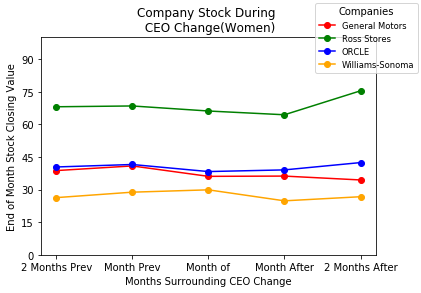

<Figure size 360x360 with 0 Axes>

In [26]:
fig, axs = plt.subplots()


axes= plt.axes()

axes.set_ylim([30,100])

axes.set_yticks(np.arange(0,100,15))
plt.plot(y_ax,gm_x_ax, marker ='o', color='red', label="General Motors")
plt.plot(y_ax,rost_x_ax, marker ='o', color='green', label="Ross Stores")
plt.plot(y_ax,or_x_ax, marker ='o', color='blue', label="ORCLE")
plt.plot(y_ax,wsm_x_ax, marker ='o', color='orange', label="Williams-Sonoma")







plt.title("Company Stock During \n CEO Change(Women)")
plt.ylabel("End of Month Stock Closing Value")
plt.xlabel("Months Surrounding CEO Change")
plt.figure(figsize=(5,5))
fig.legend(title="Companies",loc="upper right", fontsize= "small")
plt.show()


graph shows 5 months of stock values from 1 companie from each industry. From a glance you can see that the stock value change varies and there is not much of a trend between these four companies. Using a larger amount of companies from each industry, as well as daily closing stock data as opposed to monthly, would help to see any trends in imediate effect. 

In [27]:
plt.gcf()
fig.savefig("women_ceo_change.png")

<Figure size 432x288 with 0 Axes>

In [28]:
male_index = male_df.set_index(['Ticker','Date'])
male_index.head()

close   high   low   open   volume
Ticker Date                                           
BURL   1998-02-27     NaN    NaN   NaN    NaN      NaN
       1998-03-31     NaN    NaN   NaN    NaN      NaN
       1998-04-30     NaN    NaN   NaN    NaN      NaN
       1998-05-29     NaN    NaN   NaN    NaN      NaN
       1998-06-30     NaN    NaN   NaN    NaN      NaN

In [29]:
male_ceos_df

,CEO,Company,2019 Fortune 500 Rank,Effective Date as CEO,Ticker Symbol (NYS/NASDAQ)
0,Tom Kingsbury,Burlington Storers,451,12/1/08,BURL
1,Bruce Van Saun,Citizens Financial Group,415,10/1/13,CFG
2,Weston M Hicks,Alleghany,437,12/1/04,Y
3,Robert H Swan,Intel,43,6/1/18,INTC
4,Satya Nadella,Microsoft,26,2/1/14,MSFT
5,Gregory Hayes,United Technologies,46,11/1/14,UTX
6,Dr. Thpmas Kennedy,Raytheon,114,3/1/14,RTN
7,Greg Maffei,Qurate,225,2/1/06,QRTEA
8,Jim Hackett,Ford Motor,12,5/1/17,F
9,Ernie Herman,TJX,85,1/1/16,TJX


In [111]:
INTC_x_ax = (male_index.loc[('INTC', '2018-04-30'),' close'],male_index.loc[('INTC', '2018-05-31'), ' close'], 
            male_index.loc[('INTC', '2018-06-29'), ' close'], 
            male_index.loc[('INTC', '2018-07-31'), ' close'], male_index.loc[('INTC', '2018-08-31'), ' close'])


F_x_ax = (male_index.loc[('F', '2017-03-31'),' close'],male_index.loc[('F', '2017-04-28'), ' close'], 
          male_index.loc[('F', '2017-05-31'), ' close'], 
            male_index.loc[('F', '2017-06-30'), ' close'],male_index.loc[('F', '2017-07-31'), ' close'])
                         
QRTEA_x_ax = (male_index.loc[('QRTEA', '2005-12-30'),' close'], male_index.loc[('QRTEA', '2006-01-31'), ' close'], 
             male_index.loc[('QRTEA', '2006-02-28'), ' close'], 
            male_index.loc[('QRTEA', '2006-03-31'), ' close'],male_index.loc[('QRTEA', '2006-04-28'), ' close'])

msft_x_ax = (male_index.loc[('MSFT', '2013-12-31'), ' close'], male_index.loc[('MSFT', '2014-01-31'), ' close'], 
             male_index.loc[('MSFT', '2014-02-28'), ' close'], 
            male_index.loc[('MSFT', '2014-03-31'), ' close'],male_index.loc[('MSFT', '2014-04-30'), ' close'])

TJX_x_ax = (male_index.loc[('TJX', '2015-11-30'), ' close'], male_index.loc[('TJX', '2015-12-31'), ' close'], 
            male_index.loc[('TJX', '2016-01-29'), ' close'], 
            male_index.loc[('TJX', '2016-02-29'), ' close'],male_index.loc[('TJX', '2016-03-31'), ' close'])

UTX_x_ax = (male_index.loc[('UTX', '2010-11-30'), ' close'], male_index.loc[('UTX', '2010-12-31'), ' close'], 
            male_index.loc[('UTX', '2011-01-31'), ' close'], 
            male_index.loc[('UTX', '2011-02-28'), ' close'],male_index.loc[('UTX', '2011-03-31'), ' close'])

y_ax = ("2 Months Prev","Month Prev","Month of","Month After","2 Months After")

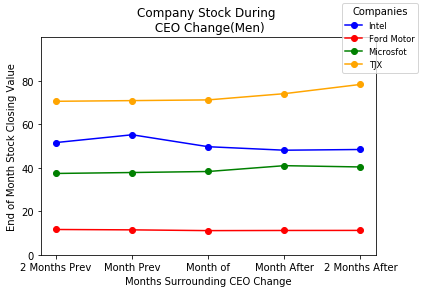

<Figure size 360x360 with 0 Axes>

In [31]:
fig, axs = plt.subplots()


axes= plt.axes()

axes.set_ylim([30,100])

axes.set_yticks(np.arange(0,100,20))
plt.plot(y_ax,INTC_x_ax, marker ='o', color='blue', label="Intel")
plt.plot(y_ax,F_x_ax, marker ='o', color='red', label="Ford Motor")
plt.plot(y_ax,msft_x_ax, marker ='o', color='green', label="Microsfot")
plt.plot(y_ax,TJX_x_ax, marker ='o', color='orange', label="TJX")







plt.title("Company Stock During \n CEO Change(Men)")
plt.ylabel("End of Month Stock Closing Value")
plt.xlabel("Months Surrounding CEO Change")
plt.figure(figsize=(5,5))
fig.legend(title="Companies",loc="upper right", fontsize= "small")
plt.show()

plt.gcf()
fig.savefig("men_ceo_change.png")

using .loc to pull a year of closing stock values month over month to observe any long term trends 

In [32]:
ibm_year_x = fem_index.loc[('IBM', '2012-01-30'):('IBM', '2013-02-28'), ' close']

gm_year_x = fem_index.loc[('GM', '2014-01-30'):('GM', '2015-02-28'), ' close']
                         
rost_year_x = fem_index.loc[('ROST', '2014-06-30'):('ROST', '2015-07-31'), ' close']

or_year_x = fem_index.loc[('ORCL', '2014-09-30'):('ORCL', '2015-10-31'), ' close']

wsm_year_x = fem_index.loc[('WSM', '2010-05-31'):('WSM', '2011-07-30'), ' close']

y_year_ax = (1,2,3,4,5,6,7,8,9,10,11,12,13,14)

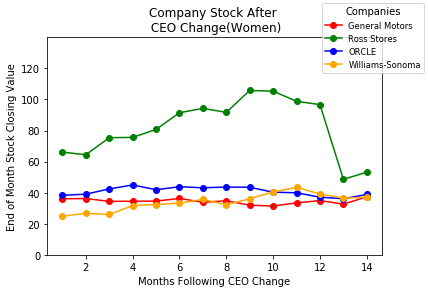

<Figure size 360x360 with 0 Axes>

In [33]:
fig, axs = plt.subplots()


axes= plt.axes()

axes.set_ylim([0,140])

axes.set_yticks(np.arange(0,140,20))

plt.plot(y_year_ax,gm_year_x, marker ='o', color='red', label="General Motors")
plt.plot(y_year_ax,rost_year_x, marker ='o', color='green', label="Ross Stores")
plt.plot(y_year_ax,or_year_x, marker ='o', color='blue', label="ORCLE")
plt.plot(y_year_ax,wsm_year_x, marker ='o', color='orange', label="Williams-Sonoma")







plt.title("Company Stock After \n CEO Change(Women)")
plt.ylabel("End of Month Stock Closing Value")
plt.xlabel("Months Following CEO Change")
plt.figure(figsize=(5,5))
fig.legend(title="Companies",loc="upper right", fontsize= "small")
plt.show()

In [34]:
plt.gcf()
fig.savefig("women_ceo_year.png")

<Figure size 432x288 with 0 Axes>

In [35]:
INTC_year_x = male_index.loc[('INTC', '2018-06-30'):('INTC', '2019-08-31'), ' close']


F_year_x = male_index.loc[('F', '2017-05-31'):('F', '2018-06-30'), ' close']
                         
msft_year_x = male_index.loc[('MSFT', '2014-01-31'):('MSFT', '2015-02-28'), ' close']

TJX_year_x = male_index.loc[('TJX', '2016-01-31'):('TJX', '2017-03-31'), ' close']

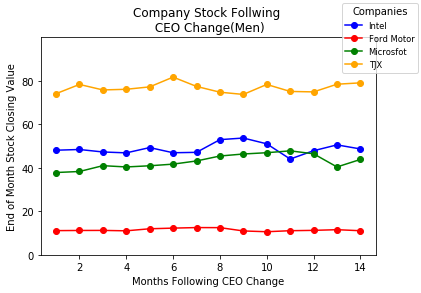

<Figure size 360x360 with 0 Axes>

In [36]:
fig, axs = plt.subplots()


axes= plt.axes()

axes.set_ylim([30,100])

axes.set_yticks(np.arange(0,100,20))
plt.plot(y_year_ax,INTC_year_x, marker ='o', color='blue', label="Intel")
plt.plot(y_year_ax,F_year_x, marker ='o', color='red', label="Ford Motor")
plt.plot(y_year_ax,msft_year_x, marker ='o', color='green', label="Microsfot")
plt.plot(y_year_ax,TJX_year_x, marker ='o', color='orange', label="TJX")







plt.title("Company Stock Follwing \n CEO Change(Men)")
plt.ylabel("End of Month Stock Closing Value")
plt.xlabel("Months Following CEO Change")
plt.figure(figsize=(5,5))
fig.legend(title="Companies",loc="upper right", fontsize= "small")
plt.show()

In [37]:
plt.gcf()
fig.savefig("men_ceo_year.png")

<Figure size 432x288 with 0 Axes>

converting tuples into a series in order to run the .diff funtion to calcuate the average in closing stock values month to month during CEO change. Men, women, and different industies

In [1]:
INTC_s = pd.Series(INTC_x_ax)
INTC_change = INTC_s.diff()

F_s = pd.Series(F_x_ax)
F_change = F_s.diff()

msft_s = pd.Series(msft_x_ax)
msft_change = msft_s.diff()

TJX_s = pd.Series(TJX_x_ax)
TJX_change = TJX_s.diff()

QRTEA_s = pd.Series(QRTEA_x_ax)
QRTEA_change = QRTEA_s.diff()

UTX_s = pd.Series(UTX_x_ax)
UTX_change = UTX_s.diff()

male_avg_change = (INTC_change.mean() + F_change.mean() + msft_change.mean() + TJX_change.mean()) / 4
male_avg_change

male_tech_change = (INTC_change.mean() + msft_change.mean()) / 2
male_retail_change = (TJX_change.mean() + QRTEA_change.mean()) / 2
male_def_change = UTX_change.mean()

male_def_change

NameError: name 'pd' is not defined

In [117]:
ibm_s = pd.Series(ibm_x_ax)
ibm_change = ibm_s.diff()

gm_s = pd.Series(gm_x_ax)
gm_change = gm_s.diff()

rost_s = pd.Series(rost_x_ax)
rost_change = rost_s.diff()

or_s = pd.Series(or_x_ax)
or_change = or_s.diff()

wsm_s = pd.Series(wsm_x_ax)
wsm_change = wsm_s.diff()

gd_s = pd.Series(gd_x_ax)
gd_change = gd_s.diff()


fem_avg_change = (gm_change.mean() + rost_change.mean() + or_change.mean() + wsm_change.mean()) / 4
fem_avg_change

fem_tech_change = (ibm_change.mean() + or_change.mean()) / 2
fem_retail_change = (rost_change.mean() + wsm_change.mean()) / 2
fem_def_change = gd_change.mean()
fem_def_change

1.0025000000000013

In [59]:
results = [(fem_avg_change),(male_avg_change)]
x_axis = ("Women CEO","Man CEO")

Text(0, 0.5, 'Average Change in Stock Value')

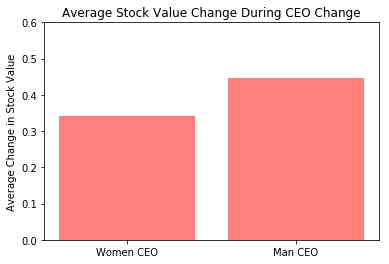

In [70]:
fig, ax = plt.subplots()


plt.bar(x_axis,results, color='r', alpha=0.5, align="center")
plt.ylim(0,.6)
plt.title("Average Stock Value Change During CEO Change")
plt.ylabel("Average Change in Stock Value")


In [71]:
plt.gcf()
fig.savefig("avg_stock_chg.png")

<Figure size 432x288 with 0 Axes>

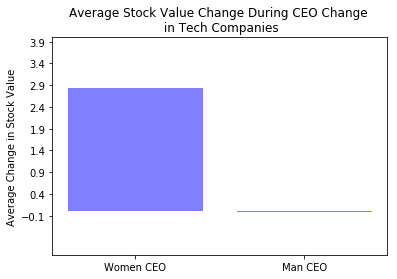

In [94]:
tech_results = [(fem_tech_change),(male_tech_change)]
fig, ax = plt.subplots()

tick_locations = np.arange(-.1, 4.5, .5)
plt.yticks(tick_locations)
plt.bar(x_axis,tech_results, color='b', alpha=0.5, align="center")
plt.ylim(-1,4)
plt.title("Average Stock Value Change During CEO Change \n in Tech Companies")
plt.ylabel("Average Change in Stock Value")
plt.gcf()
fig.savefig("avg_tech_chg.png")

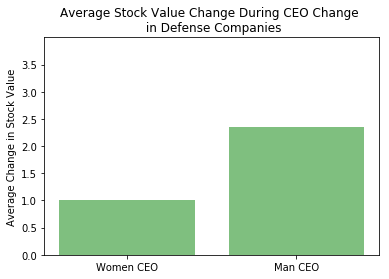

In [121]:
def_results = [(fem_def_change),(male_def_change)]
fig, ax = plt.subplots()

tick_locations = np.arange(0, 4, .5)
plt.yticks(tick_locations)
plt.bar(x_axis,def_results, color='g', alpha=0.5, align="center")
plt.ylim(0,4)
plt.title("Average Stock Value Change During CEO Change \n in Defense Companies")
plt.ylabel("Average Change in Stock Value")
plt.gcf()
fig.savefig("avg_def_chg.png")